# Better Data Encoding For Flight Delay Prediction.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, EFstrType
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv


# Dataset Description :

In [3]:
df = pd.read_csv('/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv').drop(["id"],axis=1)
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0


## Features :

- Airline
- Flight : flight identification number
- AirportFrom : departure airport 
- AirportTo : arrival airport
- DayOfWeek: Day of the week when the flight was sheduled. 1 is Monday, 7 is Sunday.
- Time : Departure time in min. example: 1 indicates 00:01
- Length : Flight duration in min.
- Delay: Boolean indicating whether the flight has been delayed or not


## Null Values :

In [4]:
df.isnull().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

There is no null values in the dataset

# Problem description : 

The goal of this notebook is to investigate on the better way to encode our categorical variables to perform a classification task and predict whether a flight will be delayed or not.

# Naive approach :

Keep only numeric data, and split the dataset into test and train set :

In [5]:
X = df.drop(["Delay","AirportFrom", "AirportTo", "Airline"],axis=1)
y = df["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train


,Flight,DayOfWeek,Time,Length
448331,1638,7,1210,190
31507,2493,4,1055,255
54212,86,6,360,175
145872,285,4,740,367
52426,115,5,1205,125
...,...,...,...,...
359783,3656,2,990,100
152315,755,4,1080,268
117952,917,2,1139,124
435829,19,7,540,95


Run DecisionTreeClassifier (classifier that gives the best results according to the other kaggle notebooks) :

In [6]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=15)

Compute the accuracy :

In [7]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.6114092902101468
0.5150056690654141


# Better encode the Flight Number :

In the Naïve approach, the "Flight" column was treated like a numerical variable, while it is in fact a categorical variable. Treating it like a numerical variable suggests that there is a notion of order between the flight numbers, while this is probably not the case. We first want to see is all flight numbers have the same probability of having their planes delayed.

## One-hot encoding :

The most basic way to encode categorical variable is one-hot encoding. 
Assuming that there are k different flight numbers in our dataset, we replace the fligh number of each of our flights by a vector of length k, filled with k-1 zeros, and a one at the position corresponding to the its fligh number. This is done using the pd.get_dummies function  

In [8]:
df_dummies = pd.get_dummies(df[["Flight"]].astype(str))
df_dummies

,Flight_1,Flight_10,Flight_100,Flight_1001,Flight_1002,Flight_1003,Flight_1004,Flight_1005,Flight_1006,Flight_1007,...,Flight_990,Flight_991,Flight_992,Flight_993,Flight_994,Flight_995,Flight_996,Flight_997,Flight_998,Flight_999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we can then add those columns to our previous dataset, and remove the previous "Flight" column :

In [9]:
## This code makes the kernel run out of memory
# df2 = df.merge(df_dummies,left_index=True, right_index=True).drop(["Flight"], axis=1)
# df2.head()

Since there is a large number of different fligh numbers, the matrix become very large and very sparse.
This adds a number of columns equal to the number of possible values for the flight number. Adding those columns to the one we already had, we end up with 6592 columns. 


In [10]:
## This code makes the kernel run out of memory
# X = df2.drop(["Delay","AirportFrom", "AirportTo", "Airline"],axis=1)
# y = df2["Delay"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)




In [11]:
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)



In [12]:
# y_pred = clf.predict(X_test)
# accuracy_score(y_pred,y_test)

Because the dataset becomes now very large, the classifier takes a long time to train. Moreover, the data is now very sparse. We have too many features and not enough training data: We fall into the curse of dimensionality.


## Target encoding :

One hot encoding is used when there is no sense of order present and we simply just want to convert categorical type to numerical type. We saw that OHE was not a good way of encoding the flight number, because it makes the data really sparse. 

Another way of encoding the flight number would be by assigning a label to each fligh number, as it was the case in the original dataset, but this time the label will be determined by the effect that the flight number has on the probability of being delayed. This is called target encoding.

To do this, we need first to compute the conditional of the flights of a fligh number to be delayed for each flight number.
Since we will then use this information for the encoding, we need to do this on the train set only, as we assume that the test set is unknown.

Note that we use the same random state to get the same shuffling as before and thus end up with the same training and testing dataset. This is important because we want to compare our implementations on the same data.

In [13]:
X = df.drop(["AirportFrom", "AirportTo", "Airline"],axis=1)
y = df["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)



We compute, for each flight number, the number of delayed flights. We divide it by the number of flights sharing this specific fligh number to get the conditional probability of a flight to be delayed, knowing its flight number.

In [14]:
proba_delay_fligh_nb = X_train.groupby("Flight")["Delay"].mean().reset_index()
proba_delay_fligh_nb

,Flight,Delay
0,1,0.532751
1,2,0.450000
2,3,0.404040
3,4,0.417778
4,5,0.455927
...,...,...
6576,7810,0.307692
6577,7811,0.365385
6578,7812,0.608696
6579,7813,1.000000


We also compute the probability of a flight to be delayed :

In [15]:
proba_delayed_all_flights = X_train["Delay"].mean()
proba_delayed_all_flights

0.44588256014980093

We can then compare the conditional probability with the total probability :

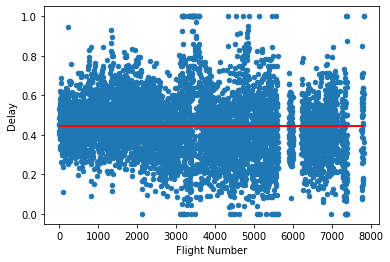

In [16]:
ax = (proba_delay_fligh_nb).sort_values(by="Delay",ascending=False).plot.scatter(x="Flight", y="Delay", xlabel="Flight Number")
ax.hlines(y=proba_delayed_all_flights, xmin=proba_delay_fligh_nb.Flight.min(), xmax=proba_delay_fligh_nb.Flight.max(), linewidth=2, color='r')
plt.show()

many flight numbers show a much larger probability of being delayed than the rest of the flights. \
Similarly, many flight numbers have a smaller probability of having their flights delayed than the other fligh numbers

We can now replace the "Flight" value by the conditional probability that we computed before :

In [17]:
X_train = X_train.drop(['Delay'], axis=1).merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_train = X_train.drop(['Flight'], axis=1)
X_train = X_train.rename(columns={'Delay': 'Flight'})

X_test = X_test.drop(['Delay'], axis=1).merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_test = X_test.drop(['Flight'], axis=1)
X_test = X_test.rename(columns={'Delay': 'Flight'})




In [18]:
X_train.head()

,DayOfWeek,Time,Length,Flight
0,7,1210,190,0.548387
1,4,1055,255,0.454545
2,6,360,175,0.389831
3,4,740,367,0.410256
4,5,1205,125,0.559471


It may happen that some flight numbers are not in X_train but are in X_test. For those flight numbers, we haven't been able to compute a probability of delay and we thus don't have a target encoding for them. We thus assign the total probability as encoding of their flight number.

In [19]:
X_test.isna().sum()

DayOfWeek    0
Time         0
Length       0
Flight       5
dtype: int64

In [20]:
X_test.Flight = X_test.Flight.fillna(proba_delayed_all_flights)

We can now run the classifier :

In [21]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.6125309380127367
0.5272943172179814


We obtain a better f1-score than the naive approach


# Use the arrival and departure airports data :

## Departure airport :

This time again, we are interested at looking at how the departure airport could impact the probability of delay.


We can compute the probability of delay for each departure airport :

In [22]:
delay_airport_from = df.groupby("AirportFrom")["Delay"].mean()
delay_airport_from

AirportFrom
ABE    0.321637
ABI    0.151659
ABQ    0.491247
ABR    0.500000
ABY    0.252874
         ...   
VPS    0.331754
WRG    0.305085
XNA    0.281028
YAK    0.157895
YUM    0.278107
Name: Delay, Length: 293, dtype: float64

And plot the 20 airports that have the largest chance of having their flights delayed, and the 20 that have the lowest chance:

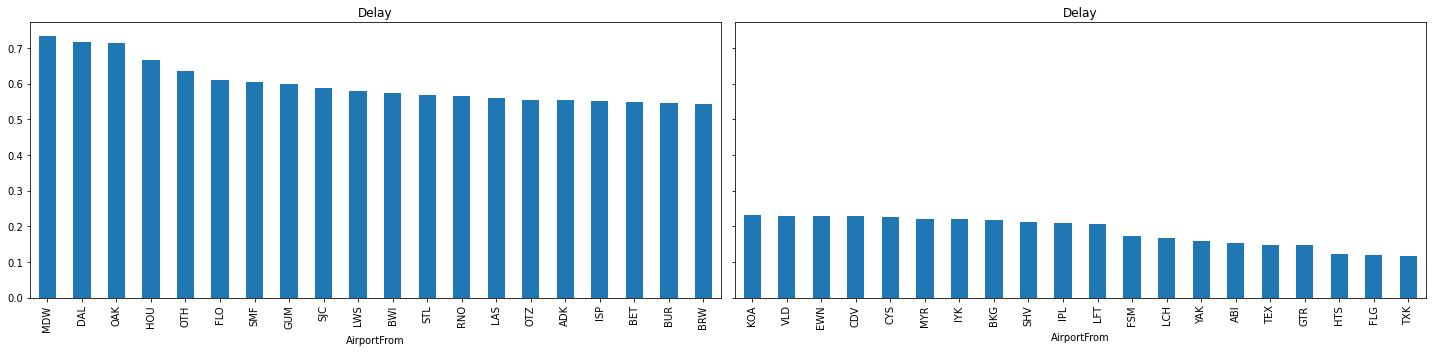

In [23]:
delay_airport_from = df.groupby("AirportFrom")["Delay"].mean()
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,5),sharey=True)
delay_airport_from.sort_values(ascending=False)[:20].plot.bar(ax = axes[0], subplots=True)
delay_airport_from.sort_values(ascending=False)[-20:].plot.bar(ax = axes[1], subplots=True)
plt.tight_layout()


We can do the same with the Arrival Airport :

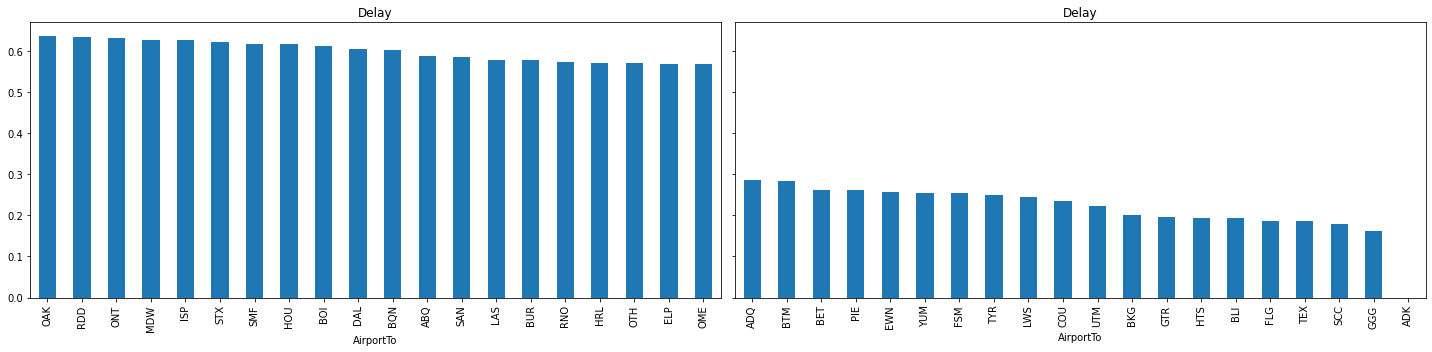

In [24]:
delay_airport_to = df.groupby("AirportTo")["Delay"].mean()
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,5),sharey=True)
delay_airport_to.sort_values(ascending=False)[:20].plot.bar(ax = axes[0], subplots=True)
delay_airport_to.sort_values(ascending=False)[-20:].plot.bar(ax = axes[1], subplots=True)
plt.tight_layout()

And we can look at some combinations of (departure airport, arrival airport) :

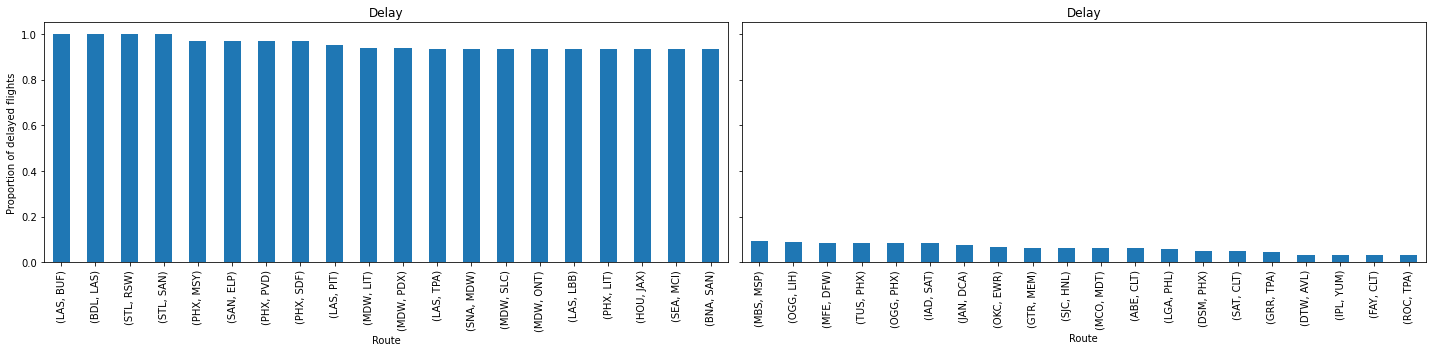

In [25]:
delay_route = df.groupby([ "AirportFrom","AirportTo"])["Delay"].mean()[df.groupby(["AirportFrom","AirportTo"])["Delay"].count() > 20]
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,5),sharey=True)
delay_route.sort_values(ascending=False)[:20].plot.bar(ax = axes[0], subplots=True,  ylabel="Proportion of delayed flights", xlabel="Route")
delay_route.sort_values(ascending=False)[-20:].plot.bar(ax = axes[1], subplots=True,  ylabel="Proportion of delayed flights", xlabel="Route")
plt.tight_layout()


Many pairs have a probability of delay of 1. This can represent a usefull information for our classification task

## Target encoding 

In [26]:
X = df.drop(["Airline"],axis=1)
y = df["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

We compute the probability of delay for each pair (AirportTo, AirportFrom) using the training set :

In [27]:
delay_airport_to = X_train.groupby(["AirportTo"])["Delay"].mean().reset_index()
delay_airport_from = X_train.groupby(["AirportFrom"])["Delay"].mean().reset_index()

X_train = X_train.drop(["Delay"], axis=1)
X_test = X_test.drop(["Delay"], axis=1)

In [28]:

## Replace AirportTo by its target encoding
X_train = X_train.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_train = X_train.drop(["AirportTo"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportTo'})

X_test = X_test.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_test = X_test.drop(["AirportTo"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportTo'})
X_test = X_test.fillna(y_train.mean())

## Replace AirportFrom by its target encoding
X_train = X_train.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_train = X_train.drop(["AirportFrom"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportFrom'})

X_test = X_test.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_test = X_test.drop(["AirportFrom"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportFrom'})
X_test = X_test.fillna(y_train.mean())




## deal with the flight numbers as before
X_train = X_train.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_train = X_train.drop(['Flight'], axis=1)
X_train = X_train.rename(columns={'Delay': 'Flight'})

X_test = X_test.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_test = X_test.drop(['Flight'], axis=1)
X_test = X_test.rename(columns={'Delay': 'Flight'})


X_train





,DayOfWeek,Time,Length,AirportTo,AirportFrom,Flight
0,7,1210,190,0.475329,0.398078,0.548387
1,4,1055,255,0.317776,0.427158,0.454545
2,6,360,175,0.454844,0.403308,0.389831
3,4,740,367,0.529281,0.386812,0.410256
4,5,1205,125,0.575982,0.452814,0.559471
...,...,...,...,...,...,...
431501,2,990,100,0.340549,0.374390,0.404762
431502,4,1080,268,0.488405,0.567581,0.459574
431503,2,1139,124,0.421584,0.573725,0.395833
431504,7,540,95,0.601876,0.496172,0.341232


Here again, there might be some pairs in X_test that were not present in X_train. We fill the "Route" column with the average probability accross all pairs :

In [29]:
X_test.isna().sum()

DayOfWeek      0
Time           0
Length         0
AirportTo      0
AirportFrom    0
Flight         5
dtype: int64

In [30]:
X_test = X_test.fillna(y_train.mean())

We can now run our classifier :

In [31]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

0.5506091575726082
0.6392650889438898


The accuracy is greatly improved. We can further target encode the pairs (AirportTo, AirportFrom), and AirportTo and AirportFrom.

In [32]:
X = df.drop(["Airline"],axis=1)
y = df["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

delay_airport_to = X_train.groupby(["AirportTo"])["Delay"].mean().reset_index()
delay_airport_from = X_train.groupby(["AirportFrom"])["Delay"].mean().reset_index()
delay_airport_route = X_train.groupby(["AirportTo", "AirportFrom"])["Delay"].mean().reset_index()



X_train = X_train.drop(["Delay"], axis=1)
X_test = X_test.drop(["Delay"], axis=1)

## Add Route column that corresponds to the target encoding of the pairs ("AirportTo","AirportFrom")
X_train = X_train.merge(delay_airport_route, left_on = ["AirportTo","AirportFrom"], right_on = ["AirportTo","AirportFrom"], how = "left")
X_train = X_train.rename(columns={'Delay': 'Route'})

X_test = X_test.merge(delay_airport_route, left_on = ["AirportTo","AirportFrom"], right_on = ["AirportTo","AirportFrom"], how = "left")
X_test = X_test.rename(columns={'Delay': 'Route'})

## Replace AirportTo by its target encoding
X_train = X_train.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_train = X_train.drop(["AirportTo"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportTo'})

X_test = X_test.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_test = X_test.drop(["AirportTo"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportTo'})
X_test = X_test.fillna(y_train.mean())

## Replace AirportFrom by its target encoding
X_train = X_train.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_train = X_train.drop(["AirportFrom"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportFrom'})

X_test = X_test.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_test = X_test.drop(["AirportFrom"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportFrom'})
X_test = X_test.fillna(y_train.mean())


X_train = X_train.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_train = X_train.drop(['Flight'], axis=1)
X_train = X_train.rename(columns={'Delay': 'Flight'})

X_test = X_test.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_test = X_test.drop(['Flight'], axis=1)
X_test = X_test.rename(columns={'Delay': 'Flight'})
X_test = X_test.fillna(y_train.mean())

X_train





,DayOfWeek,Time,Length,Route,AirportTo,AirportFrom,Flight
0,7,1210,190,0.416667,0.475329,0.398078,0.548387
1,4,1055,255,0.434783,0.317776,0.427158,0.454545
2,6,360,175,0.297297,0.454844,0.403308,0.389831
3,4,740,367,0.450704,0.529281,0.386812,0.410256
4,5,1205,125,0.545455,0.575982,0.452814,0.559471
...,...,...,...,...,...,...,...
431501,2,990,100,0.507246,0.340549,0.374390,0.404762
431502,4,1080,268,0.519231,0.488405,0.567581,0.459574
431503,2,1139,124,0.483333,0.421584,0.573725,0.395833
431504,7,540,95,0.690909,0.601876,0.496172,0.341232


We have now replaced the columns "AirportTo" and "AirportFrom", by their target encoding, and we have added the column "Route" that corresponds to the target encoding of the pairs ("AirportTo","AirportFrom"). We can now run the classifier :

In [33]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))


0.5587440571878098
0.6412302900525598


The combined feature do increase slightly the accuracy and the f1-score.

# Airline :

We now look at how the Airline compare when it comes to probaility of having their flight delayed 

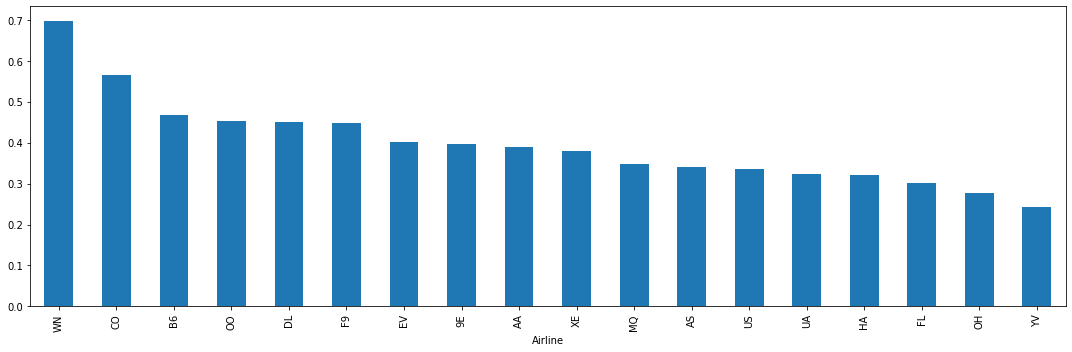

In [34]:
delay_airlines= df.groupby("Airline")["Delay"].mean()

delay_airlines.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.tight_layout()

We can then perform target encoding and train a new model:

In [35]:
X = df
y = df["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

delay_airport_to = X_train.groupby(["AirportTo"])["Delay"].mean().reset_index()
delay_airport_from = X_train.groupby(["AirportFrom"])["Delay"].mean().reset_index()
delay_airport_route = X_train.groupby(["AirportTo", "AirportFrom"])["Delay"].mean().reset_index()
delay_airlines = X_train.groupby(["Airline"])["Delay"].mean().reset_index()



X_train = X_train.drop(["Delay"], axis=1)
X_test = X_test.drop(["Delay"], axis=1)

## Add Route column that corresponds to the target encoding of the pairs ("AirportTo","AirportFrom")
X_train = X_train.merge(delay_airport_route, left_on = ["AirportTo","AirportFrom"], right_on = ["AirportTo","AirportFrom"], how = "left")
X_train = X_train.rename(columns={'Delay': 'Route'})

X_test = X_test.merge(delay_airport_route, left_on = ["AirportTo","AirportFrom"], right_on = ["AirportTo","AirportFrom"], how = "left")
X_test = X_test.rename(columns={'Delay': 'Route'})


## Replace Airline by its target encoding
X_train = X_train.merge(delay_airlines, left_on = ["Airline"], right_on = ["Airline"], how = "left")
X_train = X_train.drop(["Airline"], axis=1)
X_train = X_train.rename(columns={'Delay': 'Airline'})

X_test = X_test.merge(delay_airlines, left_on = ["Airline"], right_on = ["Airline"], how = "left")
X_test = X_test.drop(["Airline"], axis=1)
X_test = X_test.rename(columns={'Delay': 'Airline'})
X_test = X_test.fillna(y_train.mean())


## Replace AirportTo by its target encoding
X_train = X_train.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_train = X_train.drop(["AirportTo"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportTo'})

X_test = X_test.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_test = X_test.drop(["AirportTo"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportTo'})
X_test = X_test.fillna(y_train.mean())

## Replace AirportFrom by its target encoding
X_train = X_train.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_train = X_train.drop(["AirportFrom"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportFrom'})

X_test = X_test.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_test = X_test.drop(["AirportFrom"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportFrom'})
X_test = X_test.fillna(y_train.mean())


X_train = X_train.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_train = X_train.drop(['Flight'], axis=1)
X_train = X_train.rename(columns={'Delay': 'Flight'})

X_test = X_test.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_test = X_test.drop(['Flight'], axis=1)
X_test = X_test.rename(columns={'Delay': 'Flight'})
X_test = X_test.fillna(y_train.mean())


X_train


,DayOfWeek,Time,Length,Route,Airline,AirportTo,AirportFrom,Flight
0,7,1210,190,0.416667,0.388603,0.475329,0.398078,0.548387
1,4,1055,255,0.434783,0.388603,0.317776,0.427158,0.454545
2,6,360,175,0.297297,0.339015,0.454844,0.403308,0.389831
3,4,740,367,0.450704,0.324757,0.529281,0.386812,0.410256
4,5,1205,125,0.545455,0.697624,0.575982,0.452814,0.559471
...,...,...,...,...,...,...,...,...
431501,2,990,100,0.507246,0.396715,0.340549,0.374390,0.404762
431502,4,1080,268,0.519231,0.340488,0.488405,0.567581,0.459574
431503,2,1139,124,0.483333,0.302446,0.421584,0.573725,0.395833
431504,7,540,95,0.690909,0.697624,0.601876,0.496172,0.341232


In [36]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))



0.5672870684286999
0.6521594037653995


Encoding the Airlines helps at improving the accuracy of our model

# KFold target encoding :

An issue with greedy target encoding is overfitting. Indeed, the label is computed out of a probability that is often computed out of a small number of class instances. In this case, our target encoding does not generalize well. 

A possible way of avoiding overfitting is KFold target encoding. When we use kFold target encoding, we replace the label in the n-th fold by the probability computed out of the data that is in all the other folds.

In [37]:
def kfold_target_encoding(X_train, X_test, cols_encode, folds=5):
    """
    Encodes the specified columns using K-Fold target encoding.

    X_train: Training set
    X_test: Test set
    cols_encode: columns to encode using K-Fold target encoding
    folds: number of fold to use
    """
    new_X_train = X_train.copy()
    new_X_test = X_test.copy()
    kf = KFold(n_splits=folds)
    
    for col in cols_encode:
        
        ## compute total probability over entire training data 
        global_mean = new_X_train["Delay"].mean()
        
        for X_train_index, X_test_index in kf.split(X_train):
            ## compute proba over folds != n
            proba_delay = new_X_train.iloc[X_train_index].groupby(col)["Delay"].mean()
            ## assign proba to n-th fold
            new_X_train.loc[new_X_train.index[X_test_index],col] = new_X_train.loc[new_X_train.index[X_test_index],col].map(proba_delay)
        
        ## Fill NaN (some labels might not have been encountered in the folds used to compute the conditional probabilities of a fold)
        new_X_train[col].fillna(global_mean, inplace=True)

        ## update X_test using labels computed on X_train
        col_mean = new_X_train.groupby(col)["Delay"].mean()
        new_X_test[col] = new_X_test[col].map(col_mean)
        new_X_test[col].fillna(global_mean, inplace=True)
    
    new_X_train.drop(["Delay"], axis=1, inplace=True)
    new_X_test.drop(["Delay"], axis=1, inplace=True)
    return new_X_train, new_X_test



Text(0, 0.5, 'score')

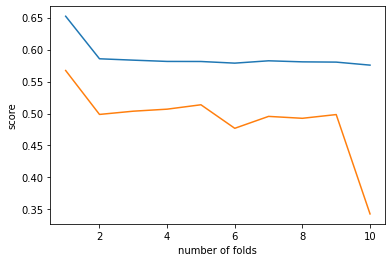

In [38]:
acc = [accuracy_score(y_pred,y_test)]
f1 = [f1_score(y_pred,y_test)]

for n_folds in range(2,11) :
    X = df
    y = df["Delay"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

    cols_encode = ["Airline", "AirportFrom","AirportTo", "Flight"]
    X_train, X_test = kfold_target_encoding(X_train, X_test,cols_encode, folds=n_folds)
    
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test))
    f1.append(f1_score(y_pred,y_test))

plt.plot(range(1,11), acc, label="accuracy")
plt.plot(range(1,11), f1, label="f1 score")
plt.xlabel("number of folds")
plt.ylabel("score")

In any case, the accuracy achived is not better than with 1 fold.

# Better encoding the departure day and time

In [39]:
df["DayOfWeek"].describe()

count    539383.000000
mean          3.929668
std           1.914664
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           7.000000
Name: DayOfWeek, dtype: float64

In the original dataset, the day is encoded usign an integer between 1 and 7.
This is not the right way to encode data as it suggests that, for example, sunday (7) is closer to saturday (6) than to monday (1), while in reality, the porbability of a flight to be delayed on sundays is closer to the one observed on mondays, as we can see on the plot bellow :

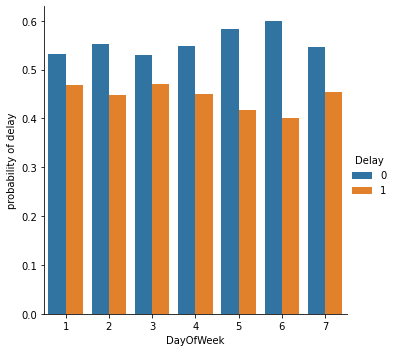

In [40]:
(df
.groupby(["DayOfWeek"])["Delay"]
.value_counts(normalize=True)
.rename('probability of delay')
.reset_index()
.pipe((sns.catplot,'data'), x="DayOfWeek",y='probability of delay',hue="Delay",kind='bar'))

### One-hot encoding :


We could use again OHE. However, OHE doesn't conserve the relationship between the days (e.g the fact that Tuesday comes after Monday for example)


### Angular encoding

We thus want to encode the fact that a Tuesday comes after a Monday, but we also want to represent the data in a way that shows that "Sunday comes after a Monday". A week is a cycle that keeps repeating and we want to keep this idea in our representation. A possible way is to use Angular distances. 

We assign to each day of the week an angle. We can't directly use this angle value because Monday (360deg/7 * 1) and Sunday (360deg/7 * 7) would have an absolute angle difference of 309deg, which should be represented as |309[mod 360]| = 51deg. We thus use sin and cos to get a unique representation of this angle, so that:

\begin{equation}
\text{Saturday} = (\cos(360/7 * 6 deg), \sin(360/7 * 6 deg))  \\
\text{Sunday} = (\cos(360/7 * 7 deg), \sin(360/7 * 7 deg))  \\
\text{Monday} = (\cos(360/7 * 1 deg), \sin(360/7 * 1 deg)) 
\end{equation}


and we get :


 \begin{align}
 \begin{aligned}
  |\text{Monday}-\text{Sunday}|^2 &= (\cos(51) - \cos(360))^2 + (\sin(51) - \sin(360))^2 \\
  &= (\cos(309) - \cos(360))^2 + (\sin(309) - \sin(360))^2 \\
  &=  |\text{Saturday}-\text{Sunday}|
 \end{aligned}
 \end{align}


We can also do the same thing with the "Time" column, that contains the departure time of the flight in min

In [41]:
df2 = df.copy()

df2["DayOfWeek_cos"] = np.cos(2*np.pi/7 * df2["DayOfWeek"]) 
df2["DayOfWeek_sin"] = np.sin(2*np.pi/7 * df2["DayOfWeek"]) 
df2["Time_cos"] = np.cos(2*np.pi/1440 * df2["Time"]) 
df2["Time_sin"] = np.sin(2*np.pi/1440 * df2["Time"]) 


X = df2.drop(["DayOfWeek","Time"],axis=1)
y = df2["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)


delay_airport_to = X_train.groupby(["AirportTo"])["Delay"].mean().reset_index()
delay_airport_from = X_train.groupby(["AirportFrom"])["Delay"].mean().reset_index()
delay_airport_route = X_train.groupby(["AirportTo", "AirportFrom"])["Delay"].mean().reset_index()
delay_airlines = X_train.groupby(["Airline"])["Delay"].mean().reset_index()



X_train = X_train.drop(["Delay"], axis=1)
X_test = X_test.drop(["Delay"], axis=1)

## Add Route column that corresponds to the target encoding of the pairs ("AirportTo","AirportFrom")
X_train = X_train.merge(delay_airport_route, left_on = ["AirportTo","AirportFrom"], right_on = ["AirportTo","AirportFrom"], how = "left")
X_train = X_train.rename(columns={'Delay': 'Route'})

X_test = X_test.merge(delay_airport_route, left_on = ["AirportTo","AirportFrom"], right_on = ["AirportTo","AirportFrom"], how = "left")
X_test = X_test.rename(columns={'Delay': 'Route'})


## Replace Airline by its target encoding
X_train = X_train.merge(delay_airlines, left_on = ["Airline"], right_on = ["Airline"], how = "left")
X_train = X_train.drop(["Airline"], axis=1)
X_train = X_train.rename(columns={'Delay': 'Airline'})

X_test = X_test.merge(delay_airlines, left_on = ["Airline"], right_on = ["Airline"], how = "left")
X_test = X_test.drop(["Airline"], axis=1)
X_test = X_test.rename(columns={'Delay': 'Airline'})
X_test = X_test.fillna(y_train.mean())


## Replace AirportTo by its target encoding
X_train = X_train.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_train = X_train.drop(["AirportTo"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportTo'})

X_test = X_test.merge(delay_airport_to, left_on = ["AirportTo"], right_on = ["AirportTo"], how = "left")
X_test = X_test.drop(["AirportTo"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportTo'})
X_test = X_test.fillna(y_train.mean())

## Replace AirportFrom by its target encoding
X_train = X_train.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_train = X_train.drop(["AirportFrom"], axis=1)
X_train = X_train.rename(columns={'Delay': 'AirportFrom'})

X_test = X_test.merge(delay_airport_from, left_on = ["AirportFrom"], right_on = ["AirportFrom"], how = "left")
X_test = X_test.drop(["AirportFrom"], axis=1)
X_test = X_test.rename(columns={'Delay': 'AirportFrom'})
X_test = X_test.fillna(y_train.mean())


X_train = X_train.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_train = X_train.drop(['Flight'], axis=1)
X_train = X_train.rename(columns={'Delay': 'Flight'})

X_test = X_test.merge(proba_delay_fligh_nb, left_on = "Flight", right_on = "Flight", how = "left")
X_test = X_test.drop(['Flight'], axis=1)
X_test = X_test.rename(columns={'Delay': 'Flight'})
X_test = X_test.fillna(y_train.mean())


X_train



,Length,DayOfWeek_cos,DayOfWeek_sin,Time_cos,Time_sin,Route,Airline,AirportTo,AirportFrom,Flight
0,190,1.000000,-2.449294e-16,5.372996e-01,-0.843391,0.416667,0.388603,0.475329,0.398078,0.548387
1,255,-0.900969,-4.338837e-01,-1.088669e-01,-0.994056,0.434783,0.388603,0.317776,0.427158,0.454545
2,175,0.623490,-7.818315e-01,6.123234e-17,1.000000,0.297297,0.339015,0.454844,0.403308,0.389831
3,367,-0.900969,-4.338837e-01,-9.961947e-01,-0.087156,0.450704,0.324757,0.529281,0.386812,0.410256
4,125,-0.222521,-9.749279e-01,5.187733e-01,-0.854912,0.545455,0.697624,0.575982,0.452814,0.559471
...,...,...,...,...,...,...,...,...,...,...
431501,100,-0.222521,9.749279e-01,-3.826834e-01,-0.923880,0.507246,0.396715,0.340549,0.374390,0.404762
431502,268,-0.900969,-4.338837e-01,-1.836970e-16,-1.000000,0.519231,0.340488,0.488405,0.567581,0.459574
431503,124,-0.222521,9.749279e-01,2.546019e-01,-0.967046,0.483333,0.302446,0.421584,0.573725,0.395833
431504,95,1.000000,-2.449294e-16,-7.071068e-01,0.707107,0.690909,0.697624,0.601876,0.496172,0.341232


In [42]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.6510006766966082
0.5664206004629576


Since we are not doing target encoding, we don't need to compute the conditional probabilities of delay given the departure time. However, assuing that the "Time" column corresponds to the effective departure time (taking into account the delay) it is interesting to see that the flights that leave very late at night (arround midnight) have a high probability of having been delayed. This is probably because some airports have to close and can't delay their flights further.

It is also interesting to see that the probability increases during the day, which might be explained by the fact that a delayed plane is also late for its other turns during the day.

In [43]:
bins = range(0,25)
df3 = df.copy()
df3.Time = pd.cut(df["Time"]/60, bins=bins)
df3 = df3.groupby("Time")["Delay"].mean()


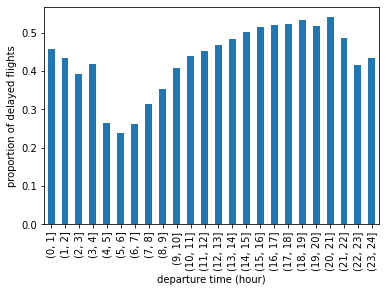

In [44]:
df3.plot.bar(y='Delay', use_index=True, xlabel="departure time (hour)", ylabel="proportion of delayed flights").figure.show()

# Catboost :

As we have seen, none of our feature encoding techniques has improved the accuracy. We have used label encoding, target encoding, K-fold target encoding,and angular encoding. 

Some classification algorithms handle categorical features using other methods. It is the case of catboost.
The documentation does not explain the encoding algorithm really well (there are numerous githib issues complaining about that. However, This presentation gives some insight on the topic : https://jaycunningham-8451.github.io/CatBoostRTutorial/presentation.html#1)

We can decalre what features are categorical, and Catboost handles them. We can compare the accuracy with the one obtained treating time, day and fligh number like numerical features, and without using the Airline, AirportFrom and AirportTo information.

In [45]:
X = df.drop(["Delay","AirportFrom", "AirportTo", "Airline"],axis=1)
y = df["Delay"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)





In [50]:
X = df.drop(["Delay"],axis=1)
y = df["Delay"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

pool_train = Pool(X_train, y_train,cat_features = ['Flight', 'AirportFrom', 'AirportTo',"Airline","DayOfWeek"])
pool_test = Pool(X_test, cat_features = ['Flight', 'AirportFrom', 'AirportTo',"Airline","DayOfWeek"])


clf = CatBoostClassifier()
clf.fit(pool_train, verbose=False)

y_pred = clf.predict(pool_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test))




0.6781334297394255
0.5973233752377417


The accuracy obtained is much lower when we don't use the categorical features. This shows the relevance of the (Airline, AirportTo, AirportFrom) features to the model.


# Label Encoding 

Some pieces of work on flight prediction using this dataset use the LabelEncoder function from scikitlearn to encode the categorical features. This function encodes target labels with values between 0 and n_classes-1. As we explained it in the case of the DayOfWeek feature, this is not the right way of encoding categorical features, and even the documentation mentions that “This transformer should be used to encode target values, i.e. y, and not the input X.”


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
X = df.drop(["Delay"],axis=1)
y = df["Delay"]

X['AirportFrom'] = encoder.fit_transform(X['AirportFrom'])
X['AirportTo'] = encoder.fit_transform(X['AirportTo'])
X['Airline'] = encoder.fit_transform(X['Airline'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)


clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))


0.5637065637065637
0.6490910944872401


Nonetheless, we obtained a good accuracy and f1-score with this encoding, which is probably why many people use this method on kaggle despite it being wrong. One explanation for this result is that decision trees are more tolerant with data encoding if we don’t limit the number of splits that the model can create for each categorical predictor. 


# Conclusion 

In this project, we showed the importance of correctly encoding the categorical features of our dataset when performing a classification task.

Starting from a baseline model corresponding to the approach taken by most kaggle users working with this dataset, we have gradually added categorical features, encoding them using different strategies, and showing the importance of using the one suitable for each feature.

Assessing the performance of our model at each step, we advocated for the use of target encoding instead of one-hot encoding for high cardinality features.
We have also decided to use the F1 score as an evaluation metric instead of the accuracy, as it is more suited to imbalanced classification tasks. At each of these steps, we also analysed the distribution of delayed flights according to each feature that we were looking at.

We have also re-encoded categorical features that were already numerically encoded, using angular encoding, to better represent the circular nature of weeks and days.

Moreover, we implemented K-Fold target encoding, which did not perform well on our dataset, and explained the possible reasons.

Finally, we tried the catboost library, which natively supports categorical features by dynamically encoding them during the training process, outperforming all of our previous models.

Although we showed that a correct encoding improves the accuracy of our model, the difference in performance with a model ran on label-encoded features (An approach that we explained to be inappropriate) is not significant. This is because the accuracy of our models is low, and because the Decision trees are naturally more robust to data encoding than other methods. This indicates that the dataset and the model that we used were probably not the best suited for our particular purpose.

Another observation is that, even though we have outperformed the models presented by other kaggle users, the accuracy and the F1 score that we obtain are very low. This shows us that the dataset is more important than the model selection.

